<a href="https://colab.research.google.com/github/abrahamfullstack/EDA-Projects/blob/main/New_York_Airbnb_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# data source https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
df = pd.read_csv('AB_NYC_2019.csv', index_col=[0])

df.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [109]:
df.shape

(48895, 15)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [111]:
df.fillna(value='Uknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

**Questions to be answered:**

Which hosts are the busiest and why?

What areas have more traffic than others and why is that the case?

Are there any relationships between prices, number of reviews, and the number of days that a given listing is booked?

**Which hosts are the busiest and why?**

Busiest Host is Sonder (NYC)

In [112]:
# group data of total monthly reviews
# we are assuming that the reviews will equal to people that rented the house

group1 = df.groupby(by=['host_id','host_name']).name.agg([len])
group1.sort_values(by='len',ascending=False)

# Sonder (NYC) is the busiest host, with 397.56 rents per month

,,len
host_id,host_name,
219517861,Sonder (NYC),327
107434423,Blueground,232
30283594,Kara,121
137358866,Kazuya,103
16098958,Jeremy & Laura,96
...,...,...
13543967,Paulina,1
13541655,Michael,1
13540183,Ashley,1


**What areas have more traffic than others and why is that the case?**

Manhatan is the area with more traffic

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


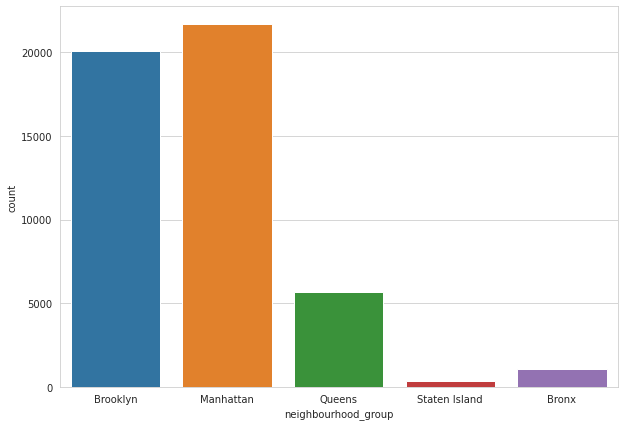

In [113]:
# use seaborn to display our data in a visual form

plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(df.neighbourhood_group)

**Are there any relationships between prices, number of reviews, and the number of days that a given listing is booked?**

There is not strong relationship between these features

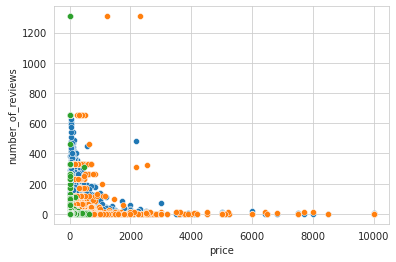

In [131]:
# group the data by the host id, so sum of prices

sns.scatterplot(x=df.groupby(['host_id','name']).price.sum(), y=df.groupby(['host_id','name']).number_of_reviews.sum())
sns.scatterplot(x=df.groupby(['host_id','name']).price.sum(), y=df.groupby(['host_id','name']).calculated_host_listings_count.sum())
sns.scatterplot(x=df.groupby(['host_id','name']).number_of_reviews.sum(), y=df.groupby(['host_id','name']).calculated_host_listings_count.sum())

In [114]:
# use correlation function
correl = df[['price', 'number_of_reviews', 'calculated_host_listings_count']].corr()
correl

,price,number_of_reviews,calculated_host_listings_count
price,1.000000,-0.047954,0.057472
number_of_reviews,-0.047954,1.000000,-0.072376
calculated_host_listings_count,0.057472,-0.072376,1.000000


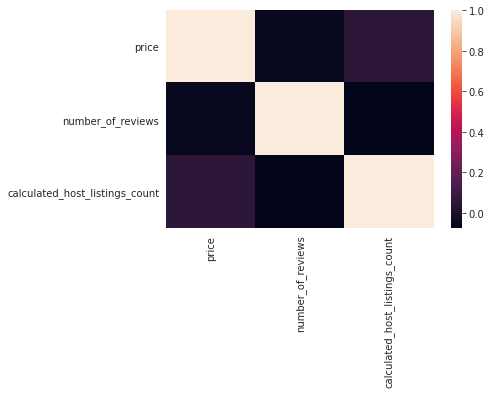

In [115]:
# correlation represented in heatmap
sns.heatmap(correl)